In [ ]:
# Student ID: 1010737874
# Student name: Han Zheng
# Instructor: Dr. Shion Guha
# Course code: INF2178
# Program: MI
# Faculty of Information
# University of Toronto


# Assignment 3

# connect to google colab
from google.colab import drive
drive.mount('/content/drive')

# import libraries
#pip install statsmodels

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/dataset/INF2178_A3_data.csv'
df = pd.read_csv(file_path)

# understand our dataset
df.head()
df.info()
df.describe()

# check if there is any missing values
missing_values_count = df.isna().sum()
print(missing_values_count)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11933 entries, 0 to 11932
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fallreadingscore             11933 non-null  float64
 1   fallmathscore                11933 non-null  float64
 2   fallgeneralknowledgescore    11933 non-null  float64
 3   springreadingscore           11933 non-null  float64
 4   springmathscore              11933 non-null  float64
 5   springgeneralknowledgescore  11933 non-null  float64
 6   totalhouseholdincome         11933 non-null  float64
 7   incomeinthousands            11933 non-null  float64
 8   incomegroup                  11933 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 839.2 KB
fallreadingscore               0
fallmathscore                  0
fallgeneralknowledgescore      0
springreadingscore             0
springmathscore                0
springgeneralknowledgescore    0
tota

In [ ]:
# delete all outliers to improve accuracy

# calculate z-scores
z_scores = stats.zscore(df.select_dtypes(include=[np.number]))  # Only numeric columns
outliers = (np.abs(z_scores) > 3).any(axis=1)

# remove outliers and get a new dataset
data = df[~outliers]

In [ ]:
# calculate score differences between spring and fall
data['gk_score_diff'] = data['springgeneralknowledgescore'] - data['fallgeneralknowledgescore']
data['reading_score_diff'] = data['springreadingscore'] - data['fallreadingscore']
data['math_score_diff'] = data['springmathscore'] - data['fallmathscore']

<ipython-input-39-23e978e58c95>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gk_score_diff'] = data['springgeneralknowledgescore'] - data['fallgeneralknowledgescore']
<ipython-input-39-23e978e58c95>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['reading_score_diff'] = data['springreadingscore'] - data['fallreadingscore']
<ipython-input-39-23e978e58c95>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

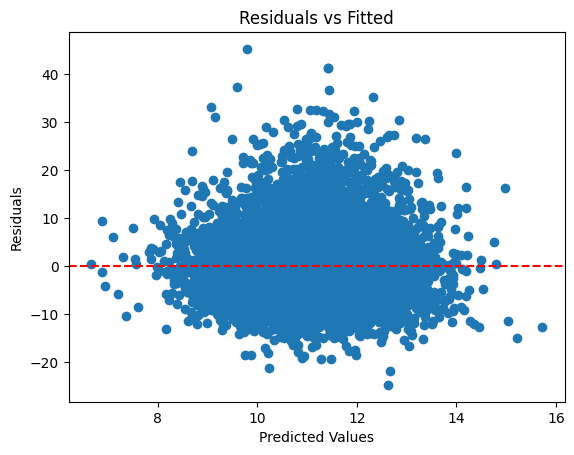

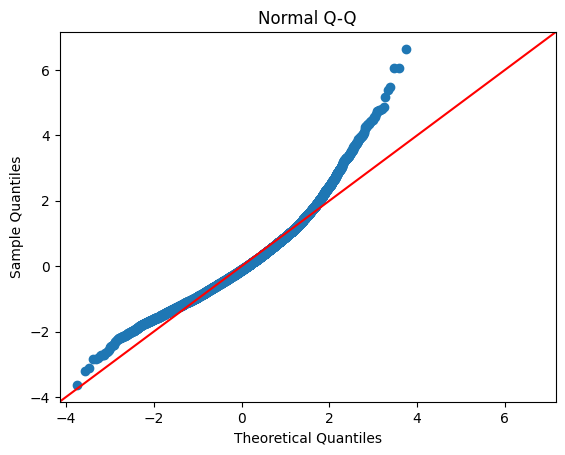

In [ ]:
# check linearity and normality before ANCOVA
model = sm.formula.ols('reading_score_diff ~ C(incomegroup) + gk_score_diff', data=data).fit()

# check for linearity and homoscedasticity
# plot the observed vs. predicted values
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Fitted')
plt.show()

# check for normality
# QQ plot
sm.qqplot(model.resid, line='45', fit=True)
plt.title('Normal Q-Q')
plt.show()

In [ ]:
# ANCOVA for reading scores
model_reading = sm.formula.ols('reading_score_diff ~ C(incomegroup) + gk_score_diff', data=data).fit()
print(model_reading.summary())

                            OLS Regression Results                            
Dep. Variable:     reading_score_diff   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     81.78
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           2.38e-52
Time:                        00:16:58   Log-Likelihood:                -38333.
No. Observations:               11490   AIC:                         7.667e+04
Df Residuals:                   11486   BIC:                         7.670e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               9.4291    

In [ ]:
## fit the ANCOVA model WITH interaction term between income group and fall general knowledge score
model_reading_interaction = sm.formula.ols('reading_score_diff ~ C(incomegroup) * gk_score_diff', data=data).fit()
print(model_reading_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:     reading_score_diff   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     49.68
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           4.45e-51
Time:                        23:39:00   Log-Likelihood:                -38331.
No. Observations:               11490   AIC:                         7.667e+04
Df Residuals:                   11484   BIC:                         7.672e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

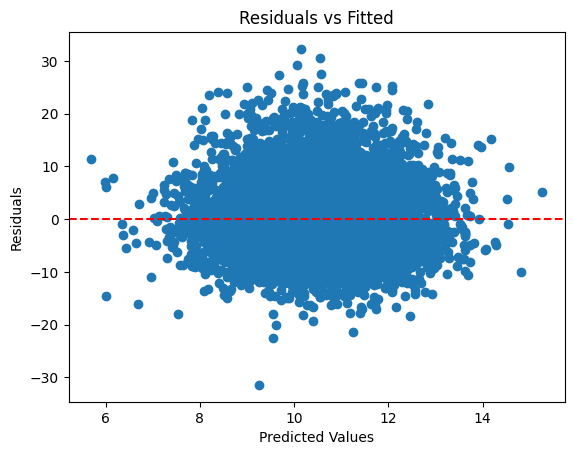

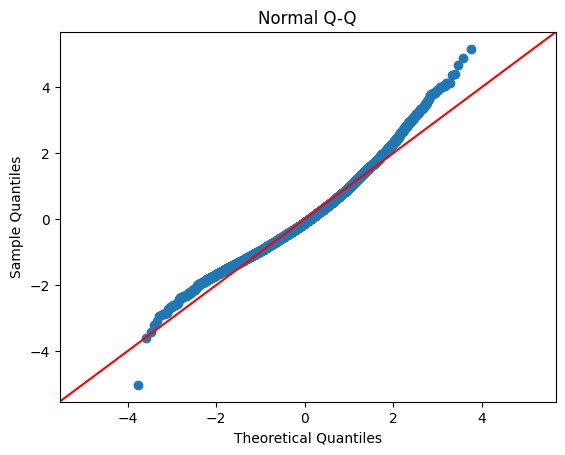

In [ ]:
# check linearity and normality before ANCOVA
model_math = sm.formula.ols('math_score_diff ~ C(incomegroup) + gk_score_diff', data=data).fit()

# check for linearity and homoscedasticity
# plot the observed vs. predicted values
plt.scatter(model_math.fittedvalues, model_math.resid)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Fitted')
plt.show()

# check for normality
# QQ plot
sm.qqplot(model_math.resid, line='45', fit=True)
plt.title('Normal Q-Q')
plt.show()

In [ ]:
# ANCOVA for math scores
model_math = sm.formula.ols('math_score_diff ~ C(incomegroup) + gk_score_diff', data=data).fit()
print(model_math.summary())

                            OLS Regression Results                            
Dep. Variable:        math_score_diff   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     116.4
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           3.14e-74
Time:                        23:40:12   Log-Likelihood:                -37365.
No. Observations:               11490   AIC:                         7.474e+04
Df Residuals:                   11486   BIC:                         7.477e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               8.6180    

In [52]:
# fit the ANCOVA model WITH interaction term between income group and fall general knowledge score
model_math_interaction = sm.formula.ols('math_score_diff ~ C(incomegroup) * gk_score_diff', data=data).fit()
print(model_math_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:        math_score_diff   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     70.26
Date:                Mon, 25 Mar 2024   Prob (F-statistic):           1.21e-72
Time:                        01:00:50   Log-Likelihood:                -37364.
No. Observations:               11490   AIC:                         7.474e+04
Df Residuals:                   11484   BIC:                         7.478e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc